## **Exponential Smoothing Methods**

- **Simple Exponential Smoothing**, which gives more weight to recent observations.
- **Holt's Linear Trend Method**, which accounts for both level and trend in the data.
- **Holt-Winters' Seasonal Method**, which captures level, trend, and seasonality in the data.


In [3]:
import warnings
warnings.filterwarnings("ignore")


import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

In [4]:
# Download stock data
ticker = "AAPL"  # Apple Inc. as an example
end_date = datetime.now()
start_date = end_date - timedelta(days=365*5)  # 5 years of data
data = yf.download(ticker, start=start_date, end=end_date)

# Display the first few rows of the data
print(data.head())

[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2019-08-05  49.497501  49.662498  48.145000  48.334999  46.647976  209572000
2019-08-06  49.077499  49.517502  48.509998  49.250000  47.531036  143299200
2019-08-07  48.852501  49.889999  48.455002  49.759998  48.023239  133457600
2019-08-08  50.049999  50.882500  49.847500  50.857498  49.082432  108038000
2019-08-09  50.325001  50.689999  49.822498  50.247501  48.677975   98478800


In [5]:
# Prepare the data
ts = data['Close'].astype(float)

## **Simple Exponential Smoothing**

- **Description:** Applies exponentially decreasing weights to past observations, giving more importance to recent data and providing a smoothed level of the series. Useful for time series data with no trend or seasonality.

- **Use Case:** Useful for smoothing out fluctuations in demand or cost metrics to better understand the underlying level of a metric, aiding in stable decision-making processes.

In [6]:
def simple_exp_smoothing(ts, alpha=0.2, periods=10):
    model = SimpleExpSmoothing(ts).fit(smoothing_level=alpha, optimized=False)
    forecast = model.forecast(steps=periods)
    return forecast

ses_forecast = simple_exp_smoothing(ts)
print("\nSimple Exponential Smoothing Forecast:")
print(ses_forecast)


Simple Exponential Smoothing Forecast:
1256    221.126607
1257    221.126607
1258    221.126607
1259    221.126607
1260    221.126607
1261    221.126607
1262    221.126607
1263    221.126607
1264    221.126607
1265    221.126607
dtype: float64


## **Holt's Linear Trend Method**

-  **Description:** An extension of exponential smoothing that accounts for trends in the data by using two equations: one for the level and one for the trend, allowing the forecast to adjust over time with increasing or decreasing trends.
-  **Use Case:** Suitable for products experiencing growth or decline, helping adjust inventory or resource allocation in line with trend direction.
 

In [7]:
def holts_linear_trend(ts, periods=10):
    model = ExponentialSmoothing(ts, trend='add').fit()
    forecast = model.forecast(steps=periods)
    return forecast

holt_forecast = holts_linear_trend(ts)
print("\nHolt's Linear Trend Method Forecast:")
print(holt_forecast)


Holt's Linear Trend Method Forecast:
1256    222.144646
1257    222.283015
1258    222.421384
1259    222.559753
1260    222.698122
1261    222.836490
1262    222.974859
1263    223.113228
1264    223.251597
1265    223.389966
dtype: float64


## **Holt-Winters' Seasonal Method**

- **Description:** Captures both trend and seasonality in the time series data. This method extends Holt’s method by adding seasonal smoothing, making it robust for handling data with both trends and complex seasonal variations.
- **Use Case:** Ideal for complex seasonal patterns, such as those found in retail sales or energy consumption, where both trend and seasonal impact need to be forecasted accurately.

In [8]:
def holt_winters_seasonal(ts, periods=10, seasonal_periods=252):  # 252 trading days in a year
    model = ExponentialSmoothing(ts, trend='add', seasonal='add', seasonal_periods=seasonal_periods).fit()
    forecast = model.forecast(steps=periods)
    return forecast

hw_forecast = holt_winters_seasonal(ts)
print("\nHolt-Winters' Seasonal Method Forecast:")
print(hw_forecast)


Holt-Winters' Seasonal Method Forecast:
1256    223.720702
1257    223.058673
1258    224.762488
1259    225.126786
1260    224.342936
1261    224.723356
1262    224.989833
1263    224.606786
1264    225.537199
1265    225.076808
dtype: float64


## **Plotting the Forecast with the Actual Data**

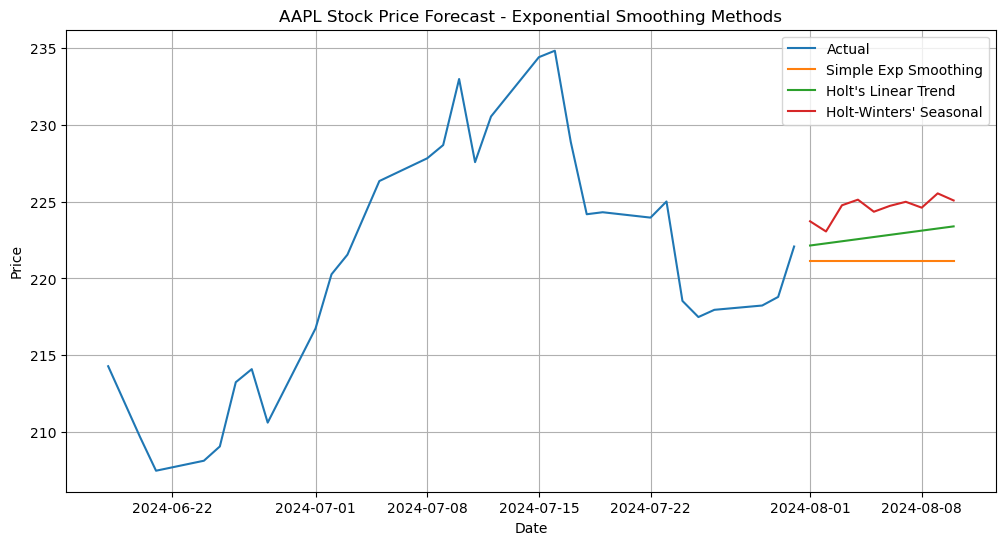

In [9]:
# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(ts.index[-30:], ts.iloc[-30:], label='Actual')
plt.plot(pd.date_range(start=ts.index[-1], periods=11, freq='D')[1:], ses_forecast, label='Simple Exp Smoothing')
plt.plot(pd.date_range(start=ts.index[-1], periods=11, freq='D')[1:], holt_forecast, label="Holt's Linear Trend")
plt.plot(pd.date_range(start=ts.index[-1], periods=11, freq='D')[1:], hw_forecast, label="Holt-Winters' Seasonal")
plt.title(f'{ticker} Stock Price Forecast - Exponential Smoothing Methods')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()